#**Hotel-Cancellation-Prediction-using-Auto-Encoders-and-KNN**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [ ]:
zip=zipfile.ZipFile('1-s2.0-S2352340918315191-mmc2 (1).zip')
zip.extractall()

**Combining two dataframes into a single dataframe**

In [ ]:
df1=pd.read_csv('H1.csv')
df2=pd.read_csv('H2.csv')
frames=[df1,df2]
df = pd.concat(frames)

In [ ]:
df=df.dropna(how='any')
df['Cancelled']=df['IsCanceled']
df['Children']=df['Children'].astype(int)
df['ADR']=df['ADR'].astype(int)
df['ArrivalDateYear']=df['ArrivalDateYear'].astype(int)
df=df.drop(columns=['ReservationStatusDate','IsCanceled','MarketSegment','DistributionChannel','ArrivalDateYear','LeadTime','Company','ADR','Agent'])
df

,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,Cancelled
0,July,27,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,0
1,July,27,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,0
2,July,27,1,0,1,1,0,0,BB,GBR,0,0,0,A,C,0,No Deposit,0,Transient,0,0,Check-Out,0
3,July,27,1,0,1,1,0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,0
4,July,27,1,0,2,2,0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,0,1,Check-Out,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,August,35,30,2,5,2,0,0,BB,BEL,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,0
79326,August,35,31,2,5,3,0,0,BB,FRA,0,0,0,E,E,0,No Deposit,0,Transient,0,2,Check-Out,0
79327,August,35,31,2,5,2,0,0,BB,DEU,0,0,0,D,D,0,No Deposit,0,Transient,0,4,Check-Out,0
79328,August,35,31,2,5,2,0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le10=LabelEncoder()
df['ArrivalDateMonth']=le.fit_transform(df['ArrivalDateMonth'])
df['Meal']=le1.fit_transform(df['Meal'])
#df['MarketSegment']=le4.fit_transform(df['MarketSegment'])
#df['DistributionChannel']=le5.fit_transform(df['DistributionChannel'])
df['ReservedRoomType']=le6.fit_transform(df['ReservedRoomType'])
df['AssignedRoomType']=le6.fit_transform(df['AssignedRoomType'])
df['DepositType']=le7.fit_transform(df['DepositType'])
df['Country']=le8.fit_transform(df['Country'])
df['CustomerType']=le9.fit_transform(df['CustomerType'])
df['ReservationStatus']=le10.fit_transform(df['ReservationStatus'])






In [ ]:
df

,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,Cancelled
0,5,27,1,0,0,2,0,0,0,135,0,0,0,2,2,3,0,0,2,0,0,1,0
1,5,27,1,0,0,2,0,0,0,135,0,0,0,2,2,4,0,0,2,0,0,1,0
2,5,27,1,0,1,1,0,0,0,59,0,0,0,0,2,0,0,0,2,0,0,1,0
3,5,27,1,0,1,1,0,0,0,59,0,0,0,0,0,0,0,0,2,0,0,1,0
4,5,27,1,0,2,2,0,0,0,59,0,0,0,0,0,0,0,0,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,1,35,30,2,5,2,0,0,0,15,0,0,0,0,0,0,0,0,2,0,0,1,0
79326,1,35,31,2,5,3,0,0,0,56,0,0,0,4,4,0,0,0,2,0,2,1,0
79327,1,35,31,2,5,2,0,0,0,43,0,0,0,3,3,0,0,0,2,0,4,1,0
79328,1,35,31,2,5,2,0,0,0,59,0,0,0,0,0,0,0,0,2,0,0,1,0


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(X.shape, y.shape)

(118898, 22) (118898,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

**Structuring Multilayer Perceptron (MLP)  Auto Encoder model**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
n_inputs=22

**Encoder Layout**

In [ ]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

**Decoder Layout**

In [ ]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='mse')

**Strucuture of Autoencoder**

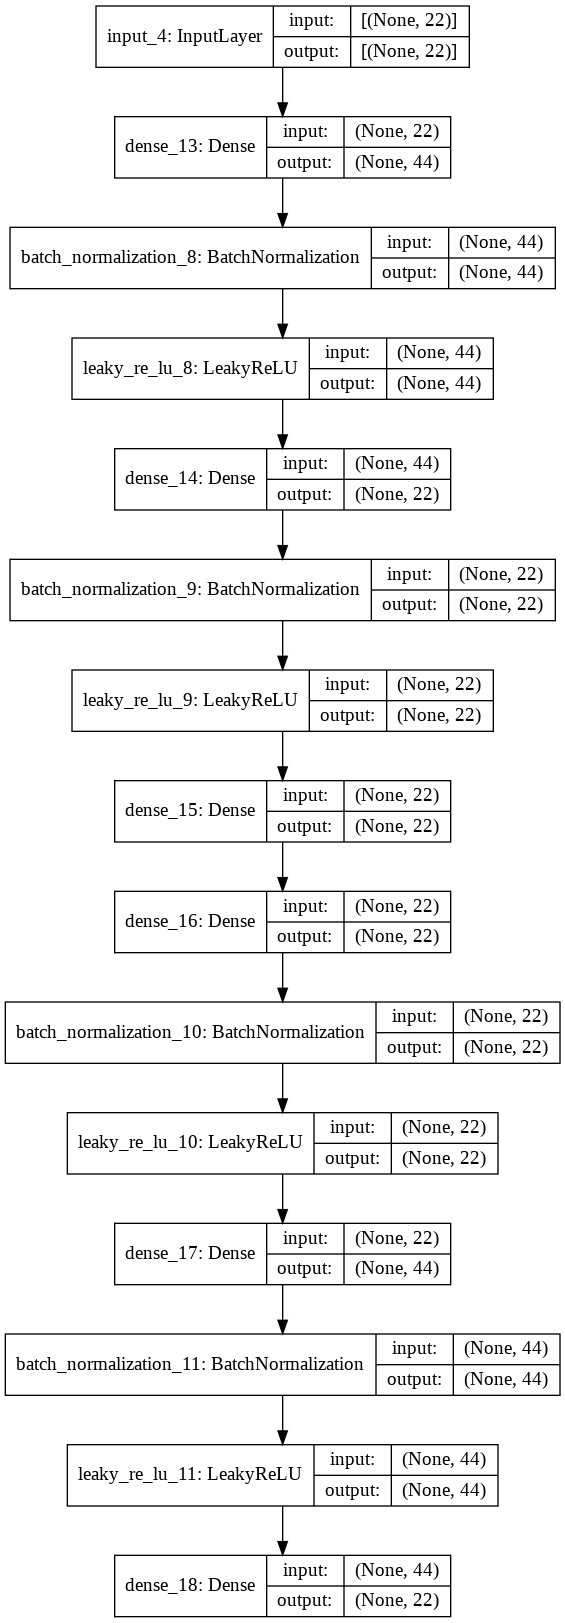

In [ ]:
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=1600, verbose=2, validation_data=(X_test,y_test))


Epoch 1/200
50/50 - 2s - loss: 0.3996 - val_loss: 0.6182
Epoch 2/200
50/50 - 1s - loss: 0.1867 - val_loss: 0.2536
Epoch 3/200
50/50 - 1s - loss: 0.0915 - val_loss: 0.2130
Epoch 4/200
50/50 - 1s - loss: 0.0404 - val_loss: 0.1527
Epoch 5/200
50/50 - 1s - loss: 0.0292 - val_loss: 0.1036
Epoch 6/200
50/50 - 1s - loss: 0.0242 - val_loss: 0.0711
Epoch 7/200
50/50 - 1s - loss: 0.0207 - val_loss: 0.0440
Epoch 8/200
50/50 - 1s - loss: 0.0187 - val_loss: 0.0323
Epoch 9/200
50/50 - 1s - loss: 0.0180 - val_loss: 0.0310
Epoch 10/200
50/50 - 1s - loss: 0.0168 - val_loss: 0.0204
Epoch 11/200
50/50 - 1s - loss: 0.0159 - val_loss: 0.0526
Epoch 12/200
50/50 - 1s - loss: 0.0142 - val_loss: 0.0248
Epoch 13/200
50/50 - 1s - loss: 0.0119 - val_loss: 0.0261
Epoch 14/200
50/50 - 1s - loss: 0.0097 - val_loss: 0.0332
Epoch 15/200
50/50 - 1s - loss: 0.0073 - val_loss: 0.0356
Epoch 16/200
50/50 - 1s - loss: 0.0056 - val_loss: 0.0104
Epoch 17/200
50/50 - 1s - loss: 0.0047 - val_loss: 0.0174
Epoch 18/200
50/50 - 1s

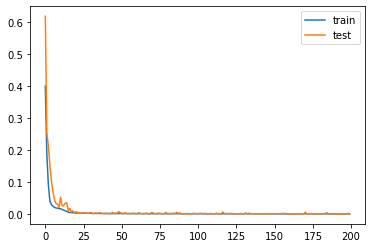

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('HC-encoder.h5')

**Testing K- Nearest Neighbours  alone for the inputs**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
mod = KNeighborsClassifier()
mod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = mod.predict(X_test)
predictions = np.round(y_pred,1)

In [ ]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 84.32%


**Applying K-Nearest Neighbours learning in conjunction with the model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
encoder = load_model('HC-encoder.h5')

In [ ]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = KNeighborsClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 100.00%
